In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt


test_data = []
#기대되는 output
test_h = []
train_data = []
train_h = []

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        test_data.append(j)
        test_h.append(float(i[3]))
        ct += 1

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        train_data.append(j)
        train_h.append(float(i[3]))
        ct += 1


train_data = np.array(train_data)

train_h = np.array(train_h)

test_data = np.array(test_data)

test_h = np.array(test_h)


537.7640156725337
269.45907768422074
134486.7538970427
100001


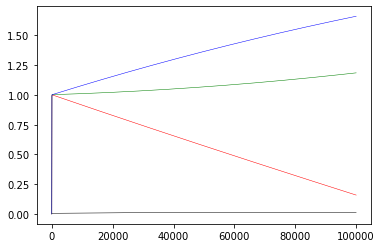

In [37]:
t0_list = []
t1_list = []
t2_list = []
t3_list = []

i = 0

#training error
J_tr = []
#testing error
J_ts = []

X = np.transpose(test_data)[1]
Y = np.transpose(test_data)[2]
Z = np.transpose(test_data)[3]

t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
theta = np.array([t0, t1, t2, t3])

#step size
a = 0.000001

#standard convergence
#무한 루프가 돌지 않기 위한 최소값
cvg = 0.000000000001

while 1:
  h = np.dot(train_data,np.transpose(theta)) - train_h
  J = np.mean(h ** 2) / 2
  J_tr.append(J)

  H = np.dot(test_data, np.transpose(theta)) - test_h
  cost = np.mean(H ** 2) / 2
  J_ts.append(cost)


  t0 = theta[0]
  t1 = theta[1]
  t2 = theta[2]
  t3 = theta[3]
  
  theta[0] = t0 - np.mean(h) * a
  theta[1] = t1 - np.mean(h * X) * a
  theta[2] = t2 - np.mean(h * Y) * a
  theta[3] = t3 - np.mean(h * Z) * a

  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  t3_list.append(t3)
  h = np.dot(train_data,np.transpose(theta)) - train_h
  #converge조건에 cost는 뺀 이유 : 제곱의 제곱이 되기 때문에 변화율이 다를 수 있다
  #제곱한 이유 : 양수값 나오게 하기 위해
  if pow((t0 - theta[0]), 2) < cvg and pow((t1 - theta[1]), 2) < cvg and pow((t2 - theta[2]), 2) < cvg and pow((t3 - theta[3]), 2) < cvg:
    break
  i += 1
  if i > 100000:
    print(J)
    break
    

CT = np.mean( (np.dot(train_data, [-1, 0.8, -1.9, 4]) - train_h) ** 2) / 2
CT2 = np.mean( (np.dot(train_data, [0, 1, 1, 1]) ) ** 2) / 2

print(CT)
print(CT2)

print(i)
t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)
plt.setp(t0_line, color = 'k', linewidth = 0.5)
plt.setp(t1_line, color = 'r', linewidth = 0.5)
plt.setp(t2_line, color = 'g', linewidth = 0.5)
plt.setp(t3_line, color = 'b', linewidth = 0.5)


plt.show()

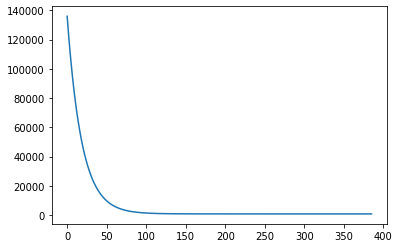

In [3]:
plt.plot(J_tr)
plt.show()

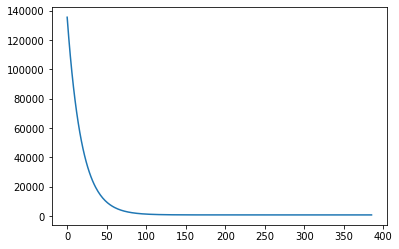

In [4]:
plt.plot(J_ts)
plt.show()

0.9970088421985289
[ 0.          0.79285367 -1.7943636   4.00796887]
103.4538494642124


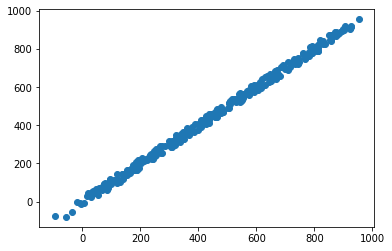

In [38]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train_data, train_h) 
print(mlr.score(train_data, train_h))

print(mlr.coef_)

y_predicted = mlr.predict(train_data)
print(((train_h - y_predicted)**2).mean() /  2)
plt.scatter(train_h, y_predicted)
plt.show()